# Demo 4: Linear Regression

## Task 1: Read data

In [27]:
import pandas as pd

In [28]:
# Read csv data:
file_path = "/Users/user/AI_Class/Supervised/Regression/data_car_stock/BMW.DE.csv"
df_BMW = pd.read_csv(file_path) # read csv file to dataframe in pandas package

In [29]:
import numpy as np

In [30]:
# Split train test at a time
Y_train = df_BMW["Close"][:1000]
Y_test = df_BMW["Close"][1000:]
t_series = np.arange(len(df_BMW))

In [31]:
t_train = t_series[:1000]
t_test = t_series[1000:]

In [32]:
len(t_test)

266

In [33]:
len(Y_test)

266

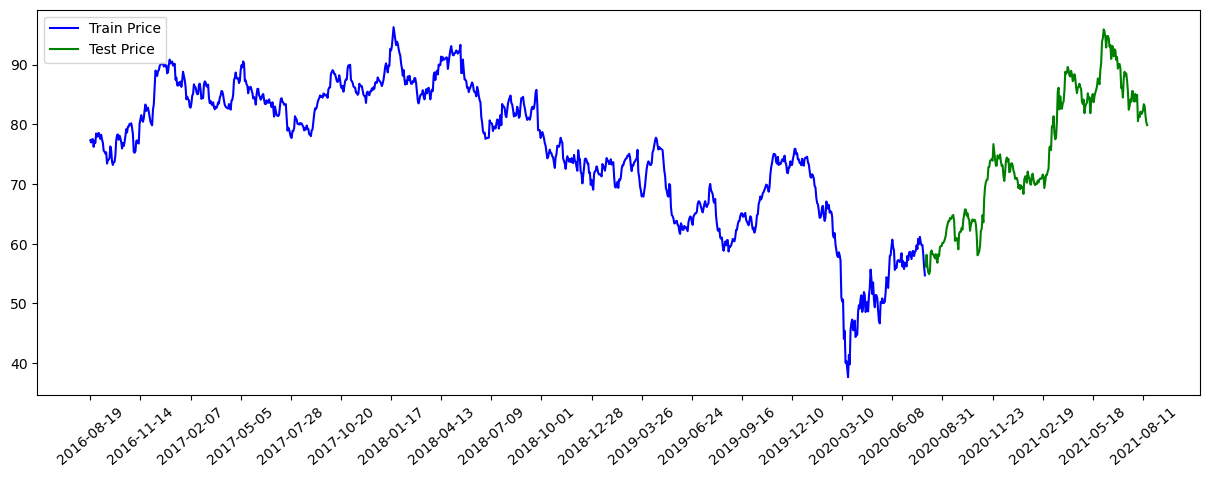

In [34]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (15,5))
ax.plot(df_BMW["Date"][t_train],
        Y_train,
        color="blue",
        label = "Train Price")
ax.plot(df_BMW["Date"][t_test],
        Y_test,
        color = "green",
        label = "Test Price")
ax.set_xticks(ax.get_xticks()[::60])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'center')# Shearing the labels to 40 degree and write it in center
ax.legend()
plt.show()

## Task 2: Predict price by Linear Regression model

In [35]:
from sklearn.linear_model import LinearRegression

In [37]:
# Model create
ln_reg = LinearRegression()
# Fit model (training model)
ln_reg.fit(t_train.reshape(-1,1),Y_train)

/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/user/anaconda3/envs/AsinkENV1/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LinearRegression()

In [38]:
Y_Pred = ln_reg.predict(t_test.reshape(-1,1))

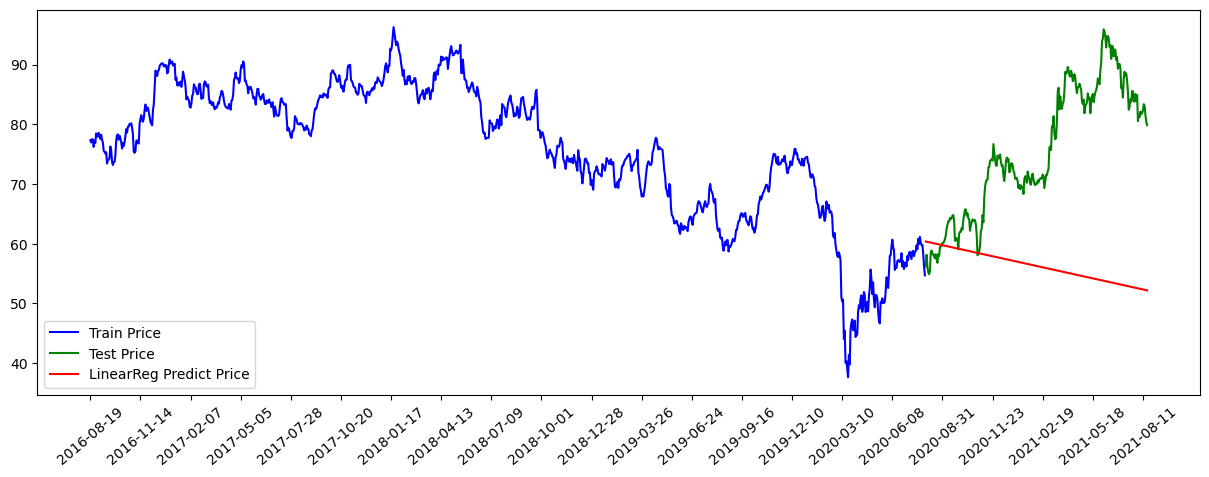

In [39]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (15,5))
# Plot time series train data
ax.plot(df_BMW["Date"][t_train],
        Y_train,
        color="blue",
        label = "Train Price")
# Plot time series test data
ax.plot(df_BMW["Date"][t_test],
        Y_test,
        color = "green",
        label = "Test Price")
# Plot time series predicted data
ax.plot(df_BMW["Date"][t_test],
        Y_Pred,
        color = "red",
        label = "LinearReg Predict Price")
ax.set_xticks(ax.get_xticks()[::60])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'center')# Shearing the labels to 40 degree and write it in center
ax.legend()
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
# report performance
mse = mean_squared_error(np.array(Y_test), np.array(Y_Pred))
print('MSE: '+str(mse))
mae = mean_absolute_error(np.array(Y_test),np.array(Y_Pred))
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(np.array(Y_test), np.array(Y_Pred)))
print('RMSE: '+str(rmse))

MSE: 532.8546223572897
MAE: 19.38415229971411
RMSE: 23.083644044155804


# Rolling with Linear Regression fiting with 10 previous data

In [68]:
Y_Pred_rolling = []
Y_update_train = list(Y_train)
t_update_train = t_train
for i in range(len(Y_test)):
    ln_reg = LinearRegression()
    # fitting model with 10 previous time series price
    x_fit = t_update_train[-10:].reshape(-1,1)
    y_fit = np.array(Y_update_train[-10:])
    ln_reg.fit(x_fit,y_fit)
    t = np.array([t_test[i]]).reshape(-1,1)
    y_pred = ln_reg.predict(t)
    Y_Pred_rolling.append(y_pred[0])
    
    # adding new data to data train
    Y_update_train.append(Y_test[len(Y_train) + i]) # Update the real data
    t_update_train = np.append(t_update_train,t_test[i])


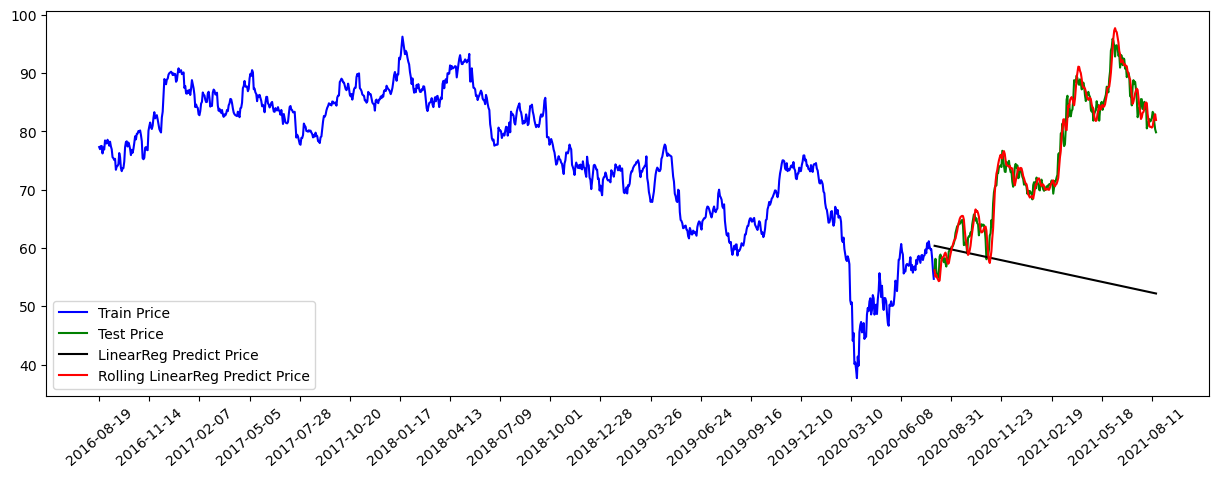

In [72]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (15,5))
# Plot time series train data
ax.plot(df_BMW["Date"][t_train],
        Y_train,
        color="blue",
        label = "Train Price")
# Plot time series test data
ax.plot(df_BMW["Date"][t_test],
        Y_test,
        color = "green",
        label = "Test Price")
# Plot time series predicted data
ax.plot(df_BMW["Date"][t_test],
        Y_Pred,
        color = "black",
        label = "LinearReg Predict Price")
ax.plot(df_BMW["Date"][t_test],
        Y_Pred_rolling,
        color = "red",
        label = "Rolling LinearReg Predict Price")
ax.set_xticks(ax.get_xticks()[::60])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'center')# Shearing the labels to 40 degree and write it in center
ax.legend()
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
# report performance
mse = mean_squared_error(np.array(Y_test), np.array(Y_Pred_rolling))
print('MSE: '+str(mse))
mae = mean_absolute_error(np.array(Y_test),np.array(Y_Pred_rolling))
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(np.array(Y_test), np.array(Y_Pred_rolling)))
print('RMSE: '+str(rmse))

MSE: 3.408733367441818
MAE: 1.429558926315787
RMSE: 1.8462755394149104
